## Calorias ⌚

En el siguiente dataset se tienen datos de 15000 individuos, que incluyen:

*   Género
*   Edad
*   Estatura (cm)
*   Peso (kg)
*   Duración de la sesión de ejercicio (min)
*   Frecuencia cardíaca (bpm)
*   Temperatura corporal (degC)
*   Calorías consumidas en la sesión

**Se desea hacer un modelo de machine learning que permita la predicción de la cantidad de calorías consumidas en una sesión, basándose en las características mencionadas.**

Se inicia el análisis con algunas hipótesis

*   Se relaciona el IMC de una persona con la cantidad de calorías quemadas en una sesión de igual duración?
*   Una temperatura corporal mayor durante el entrenamiento se asocia a una mayor cantidad de calorías consumidas?
*   La frecuencia cardíaca promedio depende de la edad del individuo?
*  El indice de masa corporal tiende a incrementar con la edad?







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/datasets/calories.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,male,68,190,94,29,105,40.8,231
1,2,female,20,166,60,14,94,40.3,66
2,3,male,69,179,79,5,88,38.7,26
3,4,female,34,179,71,13,100,40.5,71
4,5,female,27,154,58,10,81,39.8,35


In [ ]:
df.shape

(15000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
(df.isna().sum()/df.shape[0])*100

,0
User_ID,0.0
Gender,0.0
Age,0.0
Height,0.0
Weight,0.0
Duration,0.0
Heart_Rate,0.0
Body_Temp,0.0
Calories,0.0


In [ ]:
# 1️⃣ Renombrar la columna 'GENDER' a 'MALE'
df.rename(columns={'Gender': 'Male'}, inplace=True)
df

,User_ID,Male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,male,68,190,94,29,105,40.8,231
1,2,female,20,166,60,14,94,40.3,66
2,3,male,69,179,79,5,88,38.7,26
3,4,female,34,179,71,13,100,40.5,71
4,5,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,14996,female,20,193,86,11,92,40.4,45
14996,14997,female,27,165,65,6,85,39.2,23
14997,14998,female,43,159,58,16,90,40.1,75
14998,14999,male,78,193,97,2,84,38.3,11


In [ ]:
df['Male'] = df['Male'].apply(lambda x: 1 if x.lower() == 'male' else 0)


In [ ]:
df.head()

,User_ID,Male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,1,68,190,94,29,105,40.8,231
1,2,0,20,166,60,14,94,40.3,66
2,3,1,69,179,79,5,88,38.7,26
3,4,0,34,179,71,13,100,40.5,71
4,5,0,27,154,58,10,81,39.8,35


In [ ]:
# 1️⃣ Calcular la matriz de correlación
corr_matrix = df.corr().reset_index().melt(id_vars='index')

# Renombrar columnas para Altair
corr_matrix.columns = ['Variable_1', 'Variable_2', 'Correlacion']

# 2️⃣ Crear el heatmap con la paleta 'Spectral'
heatmap = alt.Chart(corr_matrix).mark_rect().encode(
    x=alt.X('Variable_1:O', sort=None, title=''),
    y=alt.Y('Variable_2:O', sort=None, title=''),
    color=alt.Color('Correlacion:Q',
                    scale=alt.Scale(scheme='spectral', domain=[-1, 1])),
    tooltip=[
        alt.Tooltip('Variable_1', title='Variable 1'),
        alt.Tooltip('Variable_2', title='Variable 2'),
        alt.Tooltip('Correlacion:Q', format=".2f", title='Correlación')
    ]
).properties(
    width=500,
    height=500,
    title='Matriz de Correlación (Escala de -1 a 1 - Paleta Spectral)'
)

# Mostrar el heatmap
heatmap


alt.Chart(...)

## Hipotesis 1

Para una sesion se la misma duración, y para participantes del mismo genero, se relaciona el IMC el peso con la cantidad de calorías quemadas?

In [ ]:
# Calcular el IMC (Índice de Masa Corporal)
df['IMC'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Verificar los primeros registros para confirmar el cálculo
df.head()


,User_ID,Male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,IMC
0,1,1,68,190,94,29,105,40.8,231,26.038781
1,2,0,20,166,60,14,94,40.3,66,21.773842
2,3,1,69,179,79,5,88,38.7,26,24.655910
3,4,0,34,179,71,13,100,40.5,71,22.159109
4,5,0,27,154,58,10,81,39.8,35,24.456063


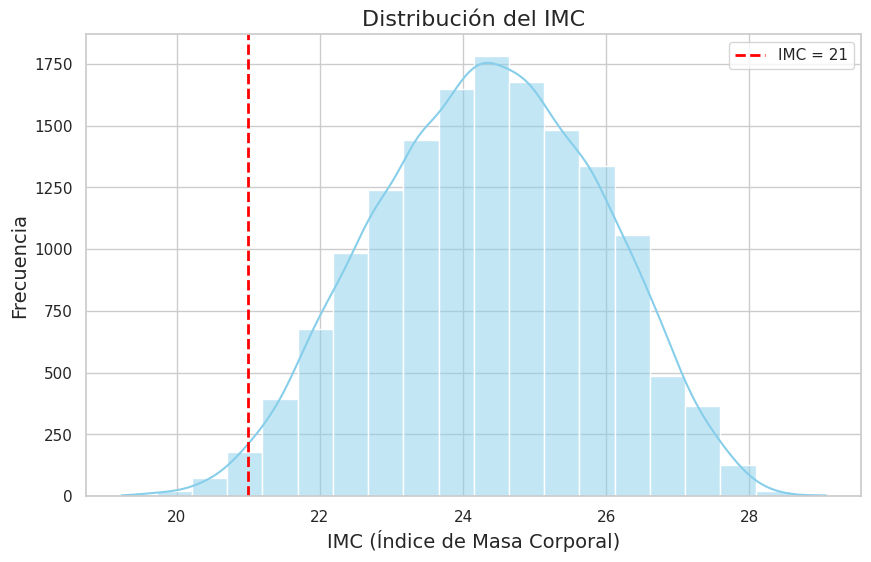

In [ ]:
# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Crear el histograma usando seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['IMC'], bins=20, kde=True, color='skyblue')

# Agregar una línea vertical en IMC = 221
plt.axvline(x=21, color='red', linestyle='--', linewidth=2, label='IMC = 21')

# Configuración de etiquetas y título
plt.title('Distribución del IMC', fontsize=16)
plt.xlabel('IMC (Índice de Masa Corporal)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()


In [ ]:
# Filtrar los datos: duración = 30 y Male = 1
filtered_data = df[(df['Duration'] == 30) & (df['Male'] == 1)].copy()

# Definir los rangos de IMC
imc_bins = [0, 20, 22, 24, 26, 28, float('inf')]
imc_labels = ['0-20', '20-22', '22-24', '24-26', '26-28', '28+']

# Crear una nueva columna para las categorías de IMC
filtered_data['IMC_Category'] = pd.cut(filtered_data['IMC'], bins=imc_bins, labels=imc_labels)

# Calcular el promedio de calorías quemadas para cada categoría de IMC
imc_calories_avg = filtered_data.groupby('IMC_Category', observed=False)['Calories'].mean().reset_index()

# Crear el gráfico de barras interactivo
fig = px.bar(
    imc_calories_avg,
    x='IMC_Category',
    y='Calories',
    color='IMC_Category',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Promedio de Calorías Quemadas por Categoría de IMC (Duración = 30, Male = 1)',
    labels={'Calories': 'Promedio de Calorías', 'IMC_Category': 'Categoría de IMC'},
    hover_data={'Calories': ':.2f'}  # Mostrar el promedio con 2 decimales al pasar el mouse
)

# Personalizar el diseño
fig.update_layout(
    xaxis_title='Categoría de IMC',
    yaxis_title='Promedio de Calorías Quemadas',
    legend_title='Rango de IMC',
    template='plotly_white'
)

# Mostrar el gráfico interactivo
fig.show()


In [ ]:
# Filtrar los datos: duración = 30 y Male = 1
filtered_data = df[(df['Duration'] == 30) & (df['Male'] == 0)].copy()

# Definir los rangos de IMC
imc_bins = [0, 20, 22, 24, 26, 28, float('inf')]
imc_labels = ['0-20', '20-22', '22-24', '24-26', '26-28', '28+']

# Crear una nueva columna para las categorías de IMC
filtered_data['IMC_Category'] = pd.cut(filtered_data['IMC'], bins=imc_bins, labels=imc_labels)

# Calcular el promedio de calorías quemadas para cada categoría de IMC
imc_calories_avg = filtered_data.groupby('IMC_Category', observed=False)['Calories'].mean().reset_index()

# Crear el gráfico de barras interactivo
fig = px.bar(
    imc_calories_avg,
    x='IMC_Category',
    y='Calories',
    color='IMC_Category',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Promedio de Calorías Quemadas por Categoría de IMC (Duración = 30, Male = 0)',
    labels={'Calories': 'Promedio de Calorías', 'IMC_Category': 'Categoría de IMC'},
    hover_data={'Calories': ':.2f'}  # Mostrar el promedio con 2 decimales al pasar el mouse
)

# Personalizar el diseño
fig.update_layout(
    xaxis_title='Categoría de IMC',
    yaxis_title='Promedio de Calorías Quemadas',
    legend_title='Rango de IMC',
    template='plotly_white'
)

# Mostrar el gráfico interactivo
fig.show()


Respuesta - Hipotesis 1
Para el caso de los participantes de genero masculino, la relacion entre el IMC y las calorías quemadas es directa. Sin embargo, para las participantes (femenino) esta relacion no es tan evidente y requiere mas analisis

## Hipotesis 2

Una temperatura corporal mayor durante el entrenamiento se asocia a una mayor cantidad de calorías consumidas?



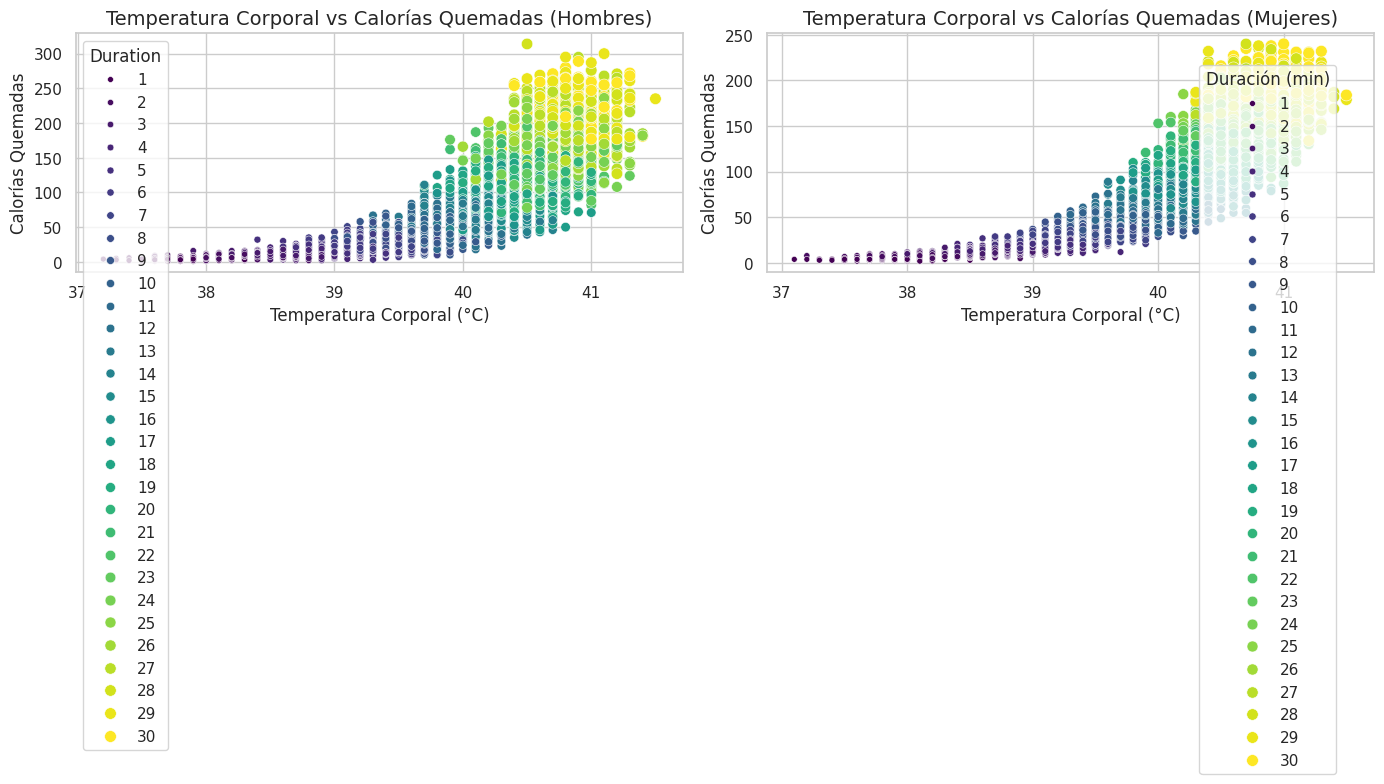

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear los gráficos de dispersión para Hombres y Mujeres
plt.figure(figsize=(14, 6))

# 1️⃣ Hombres
plt.subplot(1, 2, 1)
scatter_hombres = sns.scatterplot(
    data=df[df['Male'] == 1],   # Filtrar para hombres
    x='Body_Temp',
    y='Calories',
    hue='Duration',            # Escala de color para duración
    palette='viridis',
    size='Duration',
    legend='full'
)
plt.title('Temperatura Corporal vs Calorías Quemadas (Hombres)', fontsize=14)
plt.xlabel('Temperatura Corporal (°C)', fontsize=12)
plt.ylabel('Calorías Quemadas', fontsize=12)

# Leyenda dentro del gráfico (ajustar loc según prefieras)
# plt.legend(title='Duración (min)', loc='upper left', bbox_to_anchor=(0.7, 0.9))

# 2️⃣ Mujeres
plt.subplot(1, 2, 2)
scatter_mujeres = sns.scatterplot(
    data=df[df['Male'] == 0],   # Filtrar para mujeres
    x='Body_Temp',
    y='Calories',
    hue='Duration',
    palette='viridis',
    size='Duration',
    legend='full'
)
plt.title('Temperatura Corporal vs Calorías Quemadas (Mujeres)', fontsize=14)
plt.xlabel('Temperatura Corporal (°C)', fontsize=12)
plt.ylabel('Calorías Quemadas', fontsize=12)

# Leyenda dentro del gráfico
plt.legend(title='Duración (min)', loc='upper left', bbox_to_anchor=(0.7, 0.9))

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()
plt.show()


<ipython-input-19-4b034dbedda1>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




ValueError: 'viridis ' is not a valid palette name

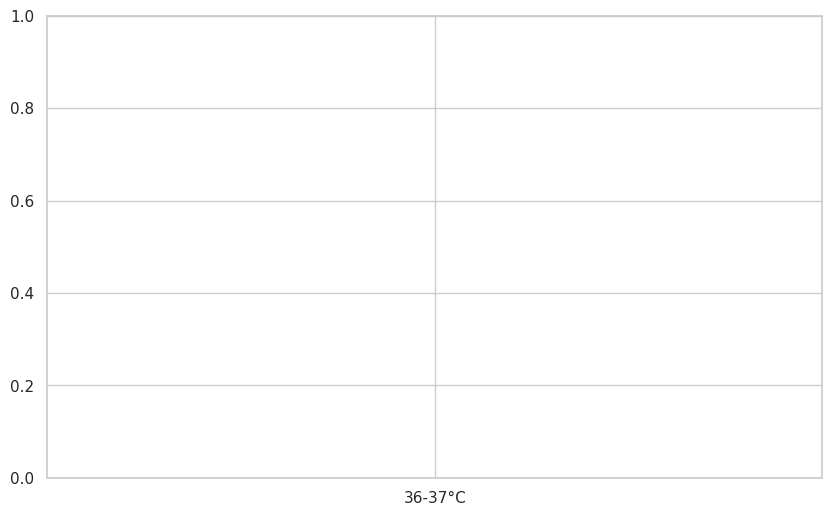

In [ ]:
# Crear categorías de temperatura
df['Temp_Range'] = pd.cut(df['Body_Temp'],
                                     bins=[36, 37, 38, 39, 40, 41],
                                     labels=['36-37°C', '37-38°C', '38-39°C', '39-40°C', '40-41°C'])

# Boxplot para comparar calorías quemadas en diferentes rangos de temperatura
plt.figure(figsize=(10, 6))
sns.boxplot(x='Temp_Range', y='Calories', data=df, palette='viridis ')

plt.title('Distribución de Calorías por Rangos de Temperatura Corporal')
plt.xlabel('Rango de Temperatura Corporal (°C)')
plt.ylabel('Calorías Quemadas')
plt.show()


Respuesta - Hipotesis 2 Tanto para hombres como para mujeres, una mayor temperatura corporal promedio durante una sesión de ejercicio se asocia con más calorías quemadas. Sin embargo se observa una gran dispersión de datos debido a la duración del ejercicio

Hipotesis 2 extra - una mayor duración se asocia con una mayor temperatura corporal promedio?

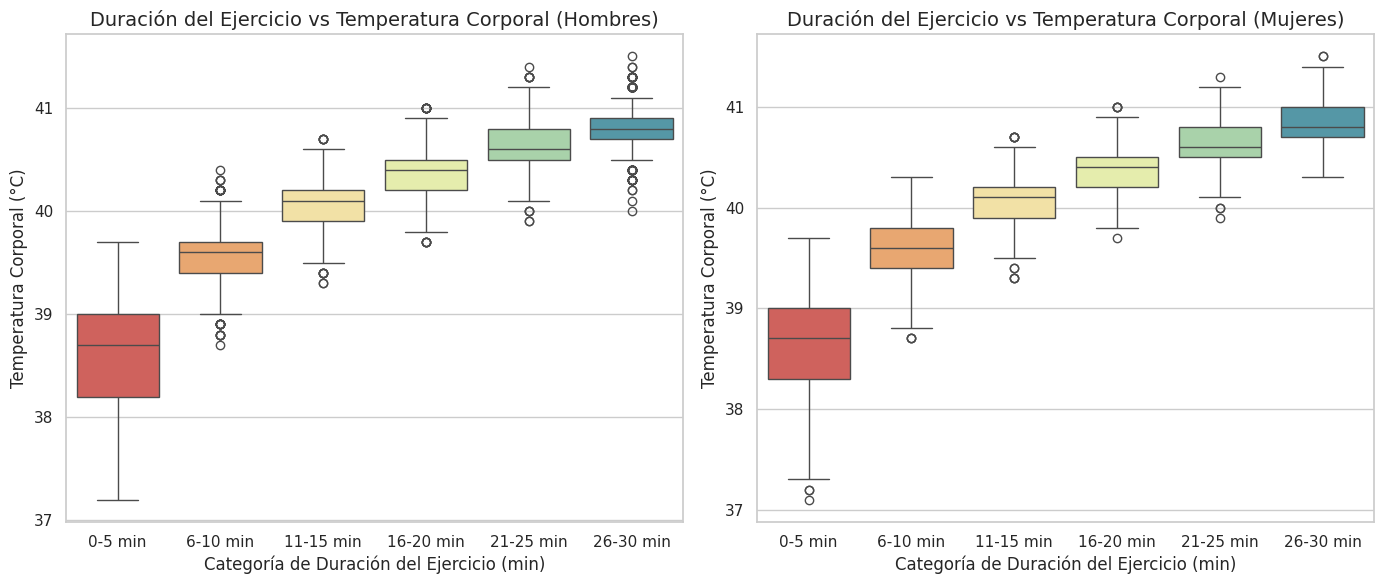

In [ ]:
# Crear categorías de duración en intervalos de 5 minutos hasta 30 minutos
df['Duration_Category'] = pd.cut(df['Duration'],
                                 bins=[0, 5, 10, 15, 20, 25, 30],
                                 labels=['0-5 min', '6-10 min', '11-15 min', '16-20 min', '21-25 min', '26-30 min'])

# Configuración del estilo
sns.set(style="whitegrid")

# Crear el boxplot para Hombres y Mujeres
plt.figure(figsize=(14, 6))

# 1️⃣ Hombres
plt.subplot(1, 2, 1)
sns.boxplot(
    x='Duration_Category',
    y='Body_Temp',
    hue='Duration_Category',     # Asignar hue para evitar el warning
    data=df[df['Male'] == 1],
    palette='Spectral',          # Paleta de colores 'Spectral'
    legend=False                 # Desactiva la leyenda duplicada
)
plt.title('Duración del Ejercicio vs Temperatura Corporal (Hombres)', fontsize=14)
plt.xlabel('Categoría de Duración del Ejercicio (min)', fontsize=12)
plt.ylabel('Temperatura Corporal (°C)', fontsize=12)

# 2️⃣ Mujeres
plt.subplot(1, 2, 2)
sns.boxplot(
    x='Duration_Category',
    y='Body_Temp',
    hue='Duration_Category',     # Asignar hue para evitar el warning
    data=df[df['Male'] == 0],
    palette='Spectral',          # Paleta de colores 'Spectral'
    legend=False
)
plt.title('Duración del Ejercicio vs Temperatura Corporal (Mujeres)', fontsize=14)
plt.xlabel('Categoría de Duración del Ejercicio (min)', fontsize=12)
plt.ylabel('Temperatura Corporal (°C)', fontsize=12)

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()
plt.show()


Respuesta - Hipotesis 2 extra: la duración de la sesión tiene relación directa con la temperatura corporal, tanto para hombres como para mujeres

## Hipotesis 3
La frecuencia cardíaca promedio depende de la edad del individuo?

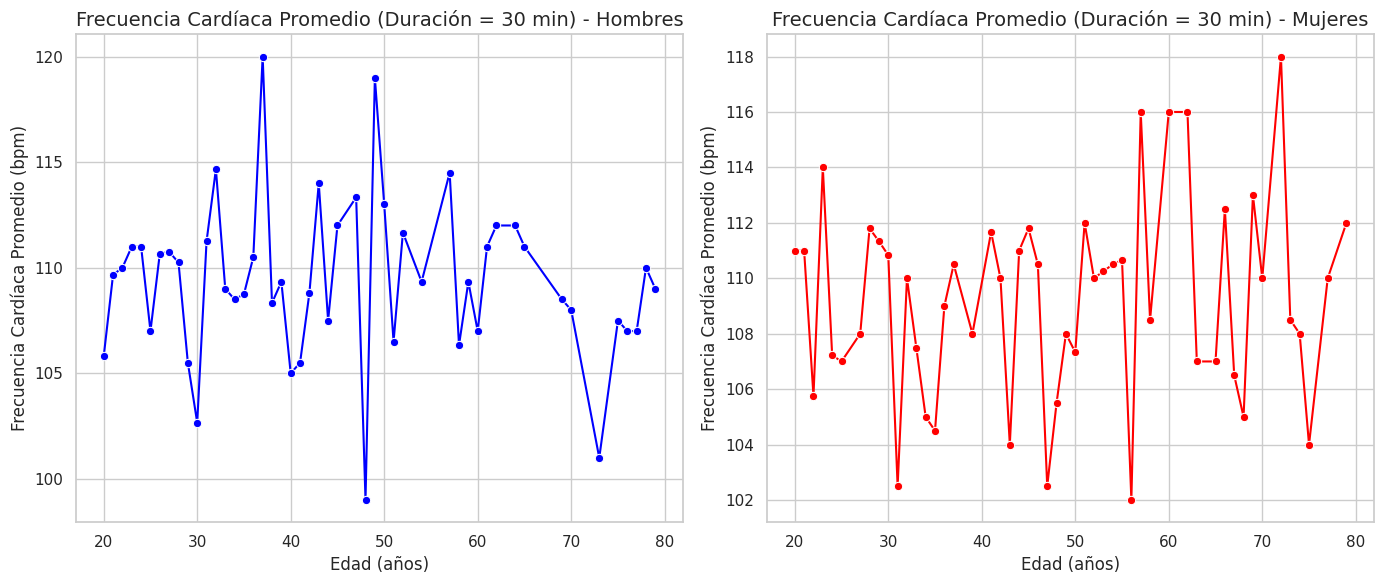

In [ ]:
# Filtrar los datos para duración = 30
df_duration_30 = df[df['Duration'] == 30]

# Agrupar por edad y calcular la frecuencia cardíaca promedio para hombres y mujeres
avg_heart_rate_male_30 = df_duration_30[df_duration_30['Male'] == 1].groupby('Age')['Heart_Rate'].mean().reset_index()
avg_heart_rate_female_30 = df_duration_30[df_duration_30['Male'] == 0].groupby('Age')['Heart_Rate'].mean().reset_index()

# Configuración del estilo
sns.set(style="whitegrid")

# Crear gráficos de línea para hombres y mujeres (solo duración = 30)
plt.figure(figsize=(14, 6))

# 1️⃣ Hombres
plt.subplot(1, 2, 1)
sns.lineplot(data=avg_heart_rate_male_30, x='Age', y='Heart_Rate', marker='o', color='blue')
plt.title('Frecuencia Cardíaca Promedio (Duración = 30 min) - Hombres', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia Cardíaca Promedio (bpm)', fontsize=12)

# 2️⃣ Mujeres
plt.subplot(1, 2, 2)
sns.lineplot(data=avg_heart_rate_female_30, x='Age', y='Heart_Rate', marker='o', color='red')
plt.title('Frecuencia Cardíaca Promedio (Duración = 30 min) - Mujeres', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia Cardíaca Promedio (bpm)', fontsize=12)

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Respuesta - Hipotesis 3: La frecuencia cardíaca promedio para un ejercicio de la misma duración, no tiene relacion con la edad. Esto aplica tanto a hombres como a mujeres

## Hipotesis 4
El indice de masa corporal tiende a incrementar con la edad?

Respuesta - Hipotesis 4: El IMC promedio tiende a aumentar con la edad, para ambos grupos de género

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calcular IMC promedio y desviación estándar para cada grupo de edad (mujeres)
avg_imc_female = df[df['Male'] == 0].groupby('Age_Group', observed=True)['IMC'].agg(['mean', 'std']).reset_index()

# Calcular IMC promedio y desviación estándar para cada grupo de edad (hombres)
avg_imc_male = df[df['Male'] == 1].groupby('Age_Group', observed=True)['IMC'].agg(['mean', 'std']).reset_index()

# Crear una figura con dos subplots uno al lado del otro
fig = make_subplots(rows=1, cols=2, subplot_titles=('Mujeres', 'Hombres'))

# Gráfico de línea para Mujeres
fig.add_trace(
    go.Scatter(
        x=avg_imc_female['Age_Group'],
        y=avg_imc_female['mean'],
        mode='lines+markers+text',
        name='Mujeres',
        text=[f"Prom: {mean:.2f}, Desv: {std:.2f}" for mean, std in zip(avg_imc_female['mean'], avg_imc_female['std'])],
        textposition='top center',
        line=dict(color='red', width=3)
    ),
    row=1, col=1
)

# Gráfico de línea para Hombres
fig.add_trace(
    go.Scatter(
        x=avg_imc_male['Age_Group'],
        y=avg_imc_male['mean'],
        mode='lines+markers+text',
        name='Hombres',
        text=[f"Prom: {mean:.2f}, Desv: {std:.2f}" for mean, std in zip(avg_imc_male['mean'], avg_imc_male['std'])],
        textposition='top center',
        line=dict(color='blue', width=3)
    ),
    row=1, col=2
)

# Configurar el diseño de la figura
fig.update_layout(
    title_text='IMC Promedio por Grupo de Edad (Comparación Hombres vs Mujeres)',
    template='plotly_white',
    showlegend=False
)

# Etiquetas de los ejes
fig.update_xaxes(title_text='Grupo de Edad', row=1, col=1)
fig.update_xaxes(title_text='Grupo de Edad', row=1, col=2)

fig.update_yaxes(title_text='IMC Promedio', row=1, col=1)
fig.update_yaxes(title_text='IMC Promedio', row=1, col=2)

# Mostrar el gráfico
fig.show()


## Modelo de regresion

Se busca predecir las calorias quemadas en función de las caracteristicas físicas del individio y la duración del ejercio.

Variable objetivo (Target): Calories
Variables predictoras (Features):

*   Físicas: Age, IMC, Male (Gender)
*   Ejercicio: Duration, Heart_Rate, Body_Temp

1.- Preparación de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1️⃣ Seleccionar las variables predictoras y la variable objetivo
features = ['Age', 'IMC', 'Male', 'Duration', 'Heart_Rate', 'Body_Temp']
target = 'Calories'

X = df[features]
y = df[target]

# 2️⃣ Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Estandarizar las variables para mejorar la precisión del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2.- Modelo de regresión

            2.1- Regresión lineal

In [ ]:
# CONSTRUCCIÓN

# 4️⃣ Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5️⃣ Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)


In [ ]:
# 6️⃣ Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 8.46
MSE: 134.48
R²: 0.97


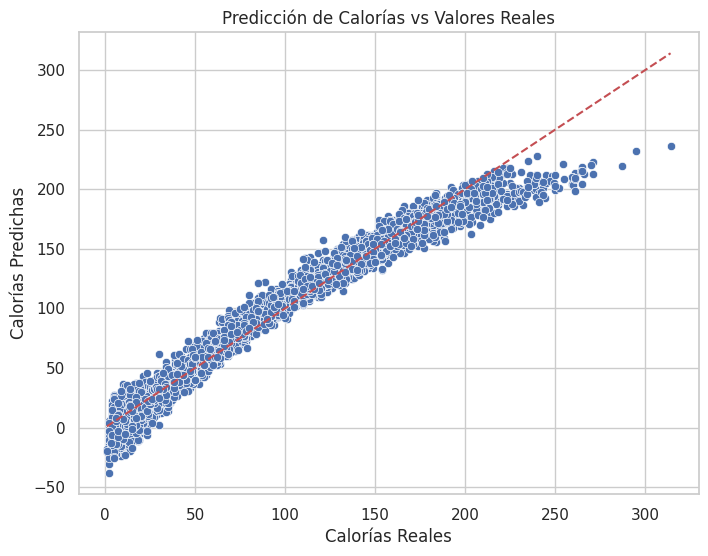

In [ ]:
## VISUALIZACION DE LA CORRELACIÓN

import matplotlib.pyplot as plt
import seaborn as sns

# Comparar valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.title('Predicción de Calorías vs Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Línea de referencia
plt.show()


In [ ]:
# Obtener la ecuación de la regresión lineal
coefficients = model.coef_
intercept = model.intercept_

# Construir y mostrar la ecuación
equation = f"Calories = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"

print(equation)


Calories = 89.02 + (8.76 * Age) + (0.27 * IMC) + (0.83 * Male) + (55.15 * Duration) + (18.98 * Heart_Rate) + (-13.22 * Body_Temp)


        2.1- Regresión logística

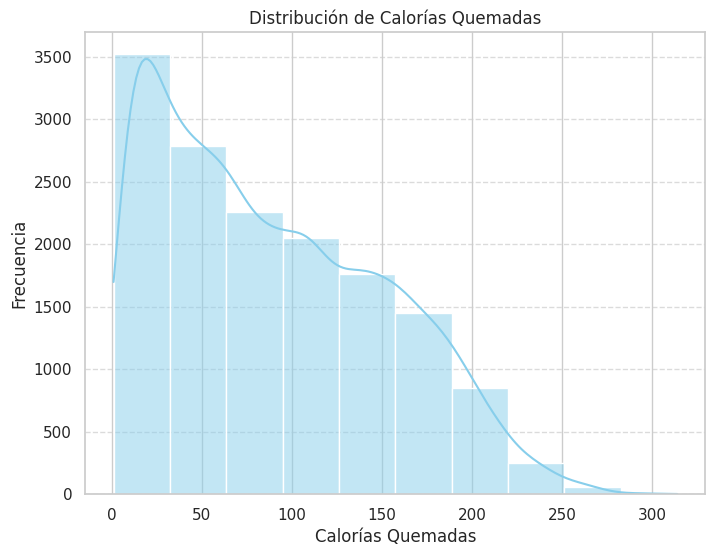

In [ ]:
# Histograma de las calorías quemadas
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Calorías Quemadas')
plt.xlabel('Calorías Quemadas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Convertir la columna 'Calories' en una variable categórica
def categorize_calories(calories):
    if calories <= 100:
        return 0  # Bajas
    elif 101 <= calories <= 200:
        return 1  # Medias
    else:
        return 2  # Altas

# Aplicar la función al DataFrame
df['Calories_Category'] = df['Calories'].apply(categorize_calories)

# Mostrar los primeros registros para verificar la nueva columna
print(df[['Calories', 'Calories_Category']].head())


   Calories  Calories_Category
0       231                  2
1        66                  0
2        26                  0
3        71                  0
4        35                  0


In [ ]:
## PREPARACION DE LOS DATOS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables predictoras y variable objetivo
features = ['Age', 'IMC', 'Male', 'Duration', 'Heart_Rate', 'Body_Temp']
target = 'Calories_Category'

X = df[features]
y = df[target]

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
## ENTRENAMIENTO DEL MODELO DE REGRESION LOGISTICA

from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = logistic_model.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Precisión del modelo en el conjunto de entrenamiento: 0.97

Reporte de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6290
           1       0.95      0.96      0.96      3707
           2       0.91      0.87      0.89       503

    accuracy                           0.97     10500
   macro avg       0.95      0.94      0.94     10500
weighted avg       0.97      0.97      0.97     10500



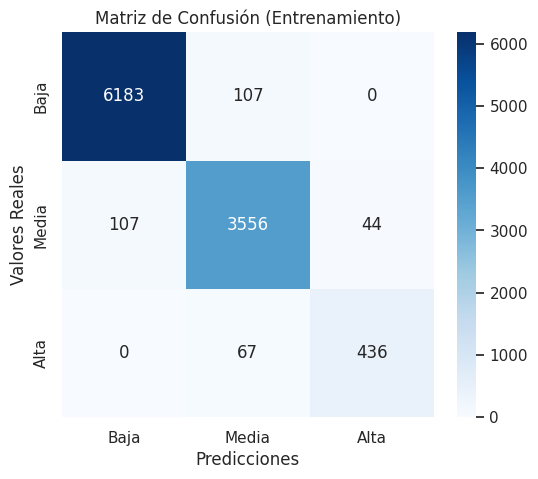


Precisión del modelo en el conjunto de prueba: 0.97
Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2663
           1       0.94      0.96      0.95      1596
           2       0.93      0.84      0.88       241

    accuracy                           0.97      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.97      0.97      0.97      4500



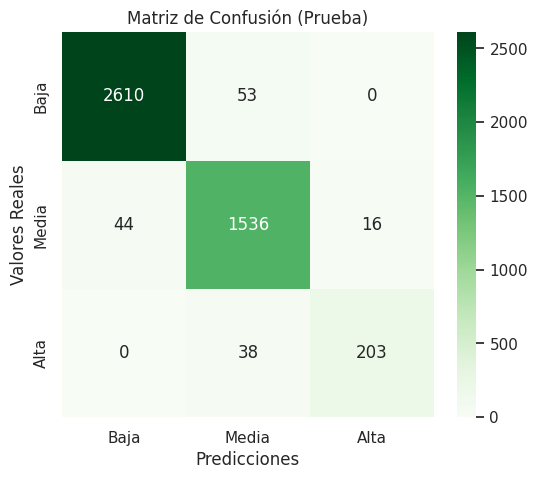

array([[2610,   53,    0],
       [  44, 1536,   16],
       [   0,   38,  203]])

In [ ]:
## EVALUACION DEL MODELO I

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Evaluación del Modelo en el Conjunto de Entrenamiento
y_train_pred = logistic_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Precisión del modelo en el conjunto de entrenamiento: {train_accuracy:.2f}")
print("\nReporte de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_pred))

# Matriz de Confusión (Entrenamiento)
cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Baja', 'Media', 'Alta'], yticklabels=['Baja', 'Media', 'Alta'])
plt.title('Matriz de Confusión (Entrenamiento)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

################################################################
# ✅ Evaluación del Modelo en el Conjunto de Prueba
y_test_pred = logistic_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nPrecisión del modelo en el conjunto de prueba: {test_accuracy:.2f}")
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

# Matriz de Confusión (Prueba)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Baja', 'Media', 'Alta'], yticklabels=['Baja', 'Media', 'Alta'])
plt.title('Matriz de Confusión (Prueba)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()
(confusion_matrix(y_test, y_test_pred))


<Figure size 600x600 with 0 Axes>

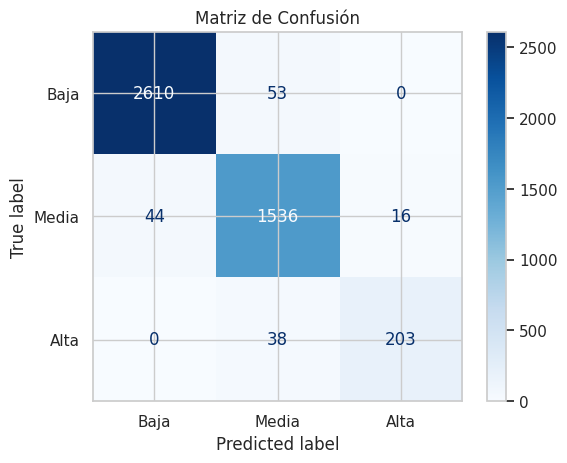

              precision    recall  f1-score   support

        Baja       0.98      0.98      0.98      2663
       Media       0.94      0.96      0.95      1596
        Alta       0.93      0.84      0.88       241

    accuracy                           0.97      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.97      0.97      0.97      4500



In [ ]:
## EVALUACION DEL MODELO II (sólo en el y_test, propuesta original)

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baja', 'Media', 'Alta'])

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['Baja', 'Media', 'Alta']))


In [ ]:
## PROBANDO EL MODELO

# Seleccionar una fila del DataFrame original para hacer la predicción
sample_data = df[features].iloc[[0]]  # Tomamos la primera fila como ejemplo
real_category = df['Calories_Category'].iloc[0]  # Categoría real de calorías

# Estandarizar la muestra usando el mismo scaler del modelo
sample_data_scaled = scaler.transform(sample_data)

# Hacer la predicción de la categoría de calorías
predicted_category = logistic_model.predict(sample_data_scaled)[0]

# Mostrar el resultado
print(f"Categoría real de calorías: {real_category}")
print(f"Categoría predicha por el modelo: {predicted_category}")


Categoría real de calorías: 2
Categoría predicha por el modelo: 2


<ipython-input-66-cb12547b17d0>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




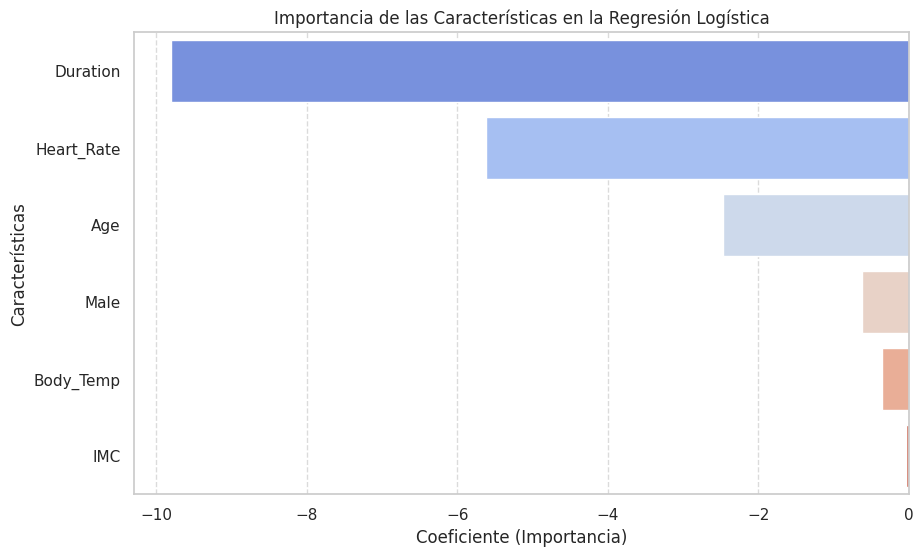

In [ ]:
## EVALUACION DEL MODELO III - Feature Importance

# Obtener los coeficientes del modelo
coefficients = logistic_model.coef_[0]  # Para el primer conjunto de clases

# Crear un DataFrame para visualizar la importancia
feature_importance = pd.Series(coefficients, index=features).sort_values()

# Gráfico de barras para la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')
plt.title('Importancia de las Características en la Regresión Logística')
plt.xlabel('Coeficiente (Importancia)')
plt.ylabel('Características')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


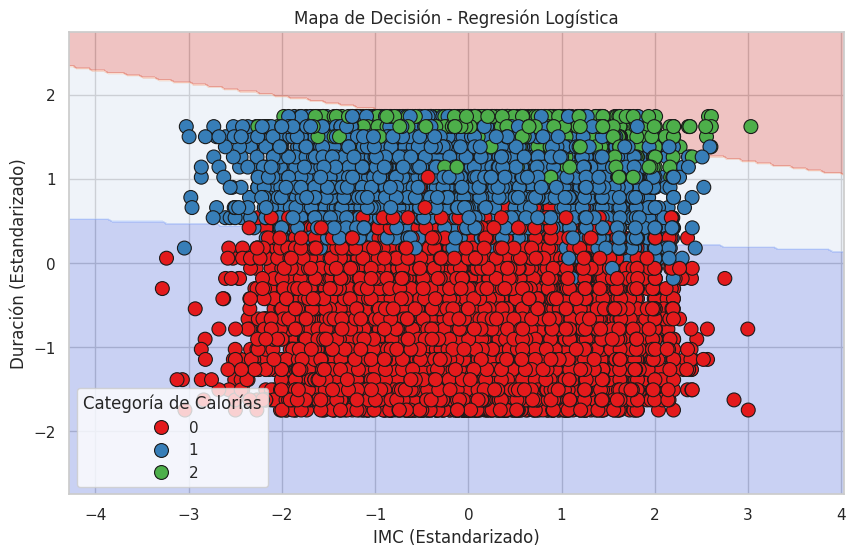

In [ ]:
## EVALUACION DEL MODELO IV - Decision Boundary

# Zonas de colores: Representan cómo el modelo clasifica las categorías de calorías.
# Puntos: Representan los datos reales del dataset.

# Usar dos variables para simplificar la visualización
X_2D = df[['IMC', 'Duration']]
y_2D = df['Calories_Category']

# Estandarizar los datos
scaler_2D = StandardScaler()
X_2D_scaled = scaler_2D.fit_transform(X_2D)

# Entrenar el modelo con solo estas dos variables
logistic_model_2D = LogisticRegression(max_iter=1000)
logistic_model_2D.fit(X_2D_scaled, y_2D)

# Crear una malla de puntos para el mapa de decisión
x_min, x_max = X_2D_scaled[:, 0].min() - 1, X_2D_scaled[:, 0].max() + 1
y_min, y_max = X_2D_scaled[:, 1].min() - 1, X_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predicciones en la malla
Z = logistic_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualización del mapa de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_2D_scaled[:, 0], y=X_2D_scaled[:, 1], hue=y_2D, palette='Set1', s=100, edgecolor='k')
plt.xlabel('IMC (Estandarizado)')
plt.ylabel('Duración (Estandarizado)')
plt.title('Mapa de Decisión - Regresión Logística')
plt.legend(title='Categoría de Calorías')
plt.show()


In [ ]:
## WIDGETS PARA JUGAR

import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Crear widgets de entrada para las características del modelo de regresión logística
widgets_list = []
for columna in features:  # Utilizamos las características del modelo
    widgets_list.append(widgets.FloatText(description=columna))

# Crear botón para realizar la predicción
boton_prediccion = widgets.Button(description="Realizar predicción")

# Función para realizar la predicción cuando se hace clic en el botón
def realizar_prediccion(b):
    # Obtener valores ingresados en los widgets de entrada
    valores = [widget.value for widget in widgets_list]

    # Convertir los valores en un DataFrame para que coincida con el scaler
    nueva_muestra = pd.DataFrame([valores], columns=features)

    # Estandarizar la nueva muestra
    nueva_muestra_escalada = scaler.transform(nueva_muestra)

    # Realizar la predicción utilizando el modelo de regresión logística
    clase_predicha = logistic_model.predict(nueva_muestra_escalada)

    # Imprimir la clase predicha
    categorias = {0: 'Baja', 1: 'Media', 2: 'Alta'}
    print("Categoría de calorías predicha:", categorias.get(clase_predicha[0], "Desconocida"))

# Asociar la función de predicción con el evento de clic del botón
boton_prediccion.on_click(realizar_prediccion)

# Mostrar los widgets y el botón
display(*widgets_list, boton_prediccion)


NameError: name 'features' is not defined

## CONCLUSIONES



*   Se obtuvo un accurady de alrededor de 97% para ambas regresiones utilizadas, en los casos de train y test, por lo que se puede considerar ambos modelos como correctos y viables
* La implementacion de este modelo puede servir como punto de partida para
desarrollar aplicaciones destinadas al monitoreo de salud, condicion física y rendimiento atlético
* Se comprobaron las hipotesis planteadas y surge de ellas un listado de motivaciones para aplicar los modelos obtenidos:
    *   El IMC tiende a incrementar con la edad, por lo que es fundamental mantener una dieta balanceada y un nivel sensato de actividad física para mantener el IMC en valores estables, preferiblemente cercanos a 21, que estan asociados a menores probabilidades de enfermedades asociadas con la obesidad*
*   La duración de la sesión de ejercicio es el factor más determinante en la cantidad de calorías gastadas, incluso más que la edad, el IMC o la temperatura corporal. Esto remarca la importancia de realizar actividad física con frecuencia, dentro de un rango de exigencia adecuado para cada persona y sus objetivos. Lo importante es el tiempo



Extra - Umbral de duración de una sesión para estar en una categoría Baja/Media/Alta

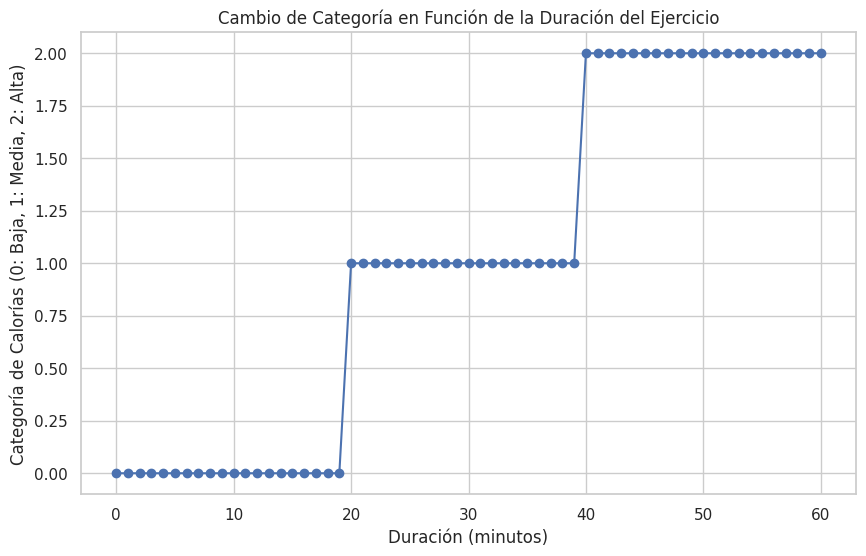

array([20, 40])

In [ ]:
# 1️⃣ Valores promedio para las otras características
mean_values = df[features].mean().to_dict()

# 2️⃣ Variar solo "Duration" de 0 a 60 minutos
durations = np.arange(0, 61, 1)  # De 0 a 60 minutos, paso de 1

# 3️⃣ Preparar los datos para predicción
predictions = []
for duration in durations:
    # Usar valores promedio para las demás variables
    sample = mean_values.copy()
    sample['Duration'] = duration

    # Convertir a DataFrame y estandarizar
    sample_df = pd.DataFrame([sample])
    sample_scaled = scaler.transform(sample_df)

    # Predecir la categoría
    pred = logistic_model.predict(sample_scaled)[0]
    predictions.append(pred)

# 4️⃣ Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(durations, predictions, marker='o')
plt.title('Cambio de Categoría en Función de la Duración del Ejercicio')
plt.xlabel('Duración (minutos)')
plt.ylabel('Categoría de Calorías (0: Baja, 1: Media, 2: Alta)')
plt.grid(True)
plt.show()

# 5️⃣ Encontrar los puntos donde ocurre el cambio de categoría
change_points = np.where(np.diff(predictions))[0]
thresholds = durations[change_points + 1]  # +1 para obtener el primer valor de la nueva categoría

thresholds
